# Mini-Proyecto END2END: Predicci√≥n de Ventas de Videojuegos üëæ


Este proyecto tiene como objetivo desarrollar un modelo de regresi√≥n para predecir las ventas globales de videojuegos utilizando un dataset que contiene informaci√≥n sobre diversos aspectos de los juegos, como la plataforma, el a√±o de lanzamiento, el g√©nero y el publisher. El an√°lisis sigue un flujo de trabajo completo de principio a fin (END2END), que abarca la carga y exploraci√≥n inicial de los datos, el preprocesamiento necesario para limpiar y preparar las variables para el modelado, la selecci√≥n y entrenamiento de un modelo de regresi√≥n lineal, la evaluaci√≥n del rendimiento del modelo utilizando m√©tricas relevantes y, finalmente, la realizaci√≥n de una predicci√≥n para un registro aleatorio. El objetivo principal es comprender la relaci√≥n entre las diferentes caracter√≠sticas de los videojuegos y su √©xito comercial a nivel global, as√≠ como demostrar la aplicaci√≥n de t√©cnicas de aprendizaje autom√°tico para la predicci√≥n de ventas.

In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn

## 1. Carga y Exploraci√≥n del Dataset

En esta secci√≥n, cargaremos el dataset que contiene informaci√≥n sobre las ventas de videojuegos y realizaremos una exploraci√≥n inicial para familiarizarnos con los datos, entender su estructura, los tipos de variables que contiene y las posibles caracter√≠sticas relevantes para nuestro objetivo de predicci√≥n.

A continuaci√≥n, cargamos el dataset utilizando la librer√≠a Pandas y mostramos las primeras filas para tener una idea del contenido.

In [12]:
import pandas as pd

df = pd.read_csv('1/vgsales.csv')

print(df.head())

df.info()

   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------  

La funci√≥n `info()` nos proporciona un resumen del dataset, incluyendo el n√∫mero de filas, columnas, los tipos de datos de cada columna y la cantidad de valores no nulos.

In [31]:
df.describe()

Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000  16598.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254   2006.416134      0.264667      0.146652      0.077782   
std     4791.853933      5.781686      0.816683      0.505351      0.309291   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4151.250000   2003.000000      0.000000      0.000000      0.000000   
50%     8300.500000   2007.000000      0.080000      0.020000      0.000000   
75%    12449.750000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16598.000000  16598.000000  
mean       0.048063      0.537441  
std        0.188588      1.555028  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.040000      0.470000  
max       10.570000     82.740000

El m√©todo `describe()` ofrece estad√≠sticas descriptivas de las columnas num√©ricas, como la media, la desviaci√≥n est√°ndar, los valores m√≠nimo y m√°ximo, y los percentiles. Esto nos ayuda a entender la distribuci√≥n y la escala de estas variables.

In [30]:
df.value_counts()

Rank   Year    NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Platform_3DO  Platform_3DS  Platform_DC  Platform_DS  Platform_GB  Platform_GBA  Platform_GC  Platform_GEN  Platform_GG  Platform_N64  Platform_NES  Platform_NG  Platform_PC  Platform_PCFX  Platform_PS  Platform_PS2  Platform_PS3  Platform_PS4  Platform_PSP  Platform_PSV  Platform_SAT  Platform_SCD  Platform_SNES  Platform_TG16  Platform_WS  Platform_Wii  Platform_WiiU  Platform_X360  Platform_XB  Platform_XOne  Genre_Adventure  Genre_Fighting  Genre_Misc  Genre_Platform  Genre_Puzzle  Genre_Racing  Genre_Role-Playing  Genre_Shooter  Genre_Simulation  Genre_Sports  Genre_Strategy  Publisher_1C Company  Publisher_20th Century Fox Video Games  Publisher_2D Boy  Publisher_3DO  Publisher_49Games  Publisher_505 Games  Publisher_5pb  Publisher_7G//AMES  Publisher_989 Sports  Publisher_989 Studios  Publisher_AQ Interactive  Publisher_ASC Games  Publisher_ASCII Entertainment  Publisher_ASCII Media Works  Publisher_ASK  Publisher_Abylight  Publisher_Acclaim Entertainment  Publisher_Accolade  Publisher_Ackkstudios  Publisher_Acquire  Publisher_Activision  Publisher_Activision Blizzard  Publisher_Activision Value  Publisher_Adeline Software  Publisher_Aerosoft  Publisher_Agatsuma Entertainment  Publisher_Agetec  Publisher_Aksys Games  Publisher_Alawar Entertainment  Publisher_Alchemist  Publisher_Alternative Software  Publisher_Altron  Publisher_Alvion  Publisher_American Softworks  Publisher_Angel Studios  Publisher_Answer Software  Publisher_Aqua Plus  Publisher_Aques  Publisher_Arc System Works  Publisher_Arena Entertainment  Publisher_Aria  Publisher_Arika  Publisher_ArtDink  Publisher_Aruze Corp  Publisher_Ascaron Entertainment  Publisher_Ascaron Entertainment GmbH  Publisher_Asgard  Publisher_Asmik Ace Entertainment  Publisher_Asmik Corp  Publisher_Aspyr  Publisher_Astragon  Publisher_Asylum Entertainment  Publisher_Atari  Publisher_Athena  Publisher_Atlus  Publisher_Avalon Interactive  Publisher_Avanquest  Publisher_Avanquest Software  Publisher_Axela  Publisher_BAM! Entertainment  Publisher_BMG Interactive Entertainment  Publisher_BPS  Publisher_Banpresto  Publisher_Benesse  Publisher_Berkeley  Publisher_Bethesda Softworks  Publisher_Big Ben Interactive  Publisher_Big Fish Games  Publisher_Bigben Interactive  Publisher_Black Bean Games  Publisher_Black Label Games  Publisher_Blast! Entertainment Ltd  Publisher_Blue Byte  Publisher_Bohemia Interactive  Publisher_Bomb  Publisher_Boost On  Publisher_Brash Entertainment  Publisher_Broccoli  Publisher_BushiRoad  Publisher_CBS Electronics  Publisher_CCP  Publisher_CDV Software Entertainment  Publisher_CPG Products  Publisher_CTO SpA  Publisher_Capcom  Publisher_Cave  Publisher_ChunSoft  Publisher_City Interactive  Publisher_Cloud Imperium Games Corporation  Publisher_Coconuts Japan  Publisher_Codemasters  Publisher_Codemasters Online  Publisher_CokeM Interactive  Publisher_Coleco  Publisher_Comfort  Publisher_Commseed  Publisher_Compile  Publisher_Compile Heart  Publisher_Conspiracy Entertainment  Publisher_Core Design Ltd.  Publisher_Crave Entertainment  Publisher_Creative Core  Publisher_Crimson Cow  Publisher_Crystal Dynamics  Publisher_Culture Brain  Publisher_Culture Publishers  Publisher_CyberFront  Publisher_Cygames  Publisher_D3Publisher  Publisher_DHM Interactive  Publisher_DSI Games  Publisher_DTP Entertainment  Publisher_Daedalic  Publisher_Daedalic Entertainment  Publisher_Daito  Publisher_Data Age  Publisher_Data Design Interactive  Publisher_Data East  Publisher_Datam Polystar  Publisher_Deep Silver  Publisher_Destination Software, Inc  Publisher_Destineer  Publisher_Detn8 Games  Publisher_Devolver Digital  Publisher_DigiCube  Publisher_Disney Interactive Studios  Publisher_Dorart  Publisher_DreamCatcher Interactive  Publisher_DreamWorks Interactive  Publisher_Dusenberry Martin Racing  Publisher_EA Games  Publisher_EON Digital Entertainment  Publisher_ESP  Publisher_Easy Interactive  Publisher_Ecole  

Para comprender mejor la distribuci√≥n de las variables categ√≥ricas, utilizamos `value_counts()` para ver la frecuencia de cada categor√≠a en algunas de las columnas clave como 'Platform', 'Genre' y 'Publisher'. Esto nos da una idea de la representaci√≥n de cada categor√≠a en el dataset.

## 1.1. Histogramas

An√°lisis de las distribuciones de las variables num√©ricas

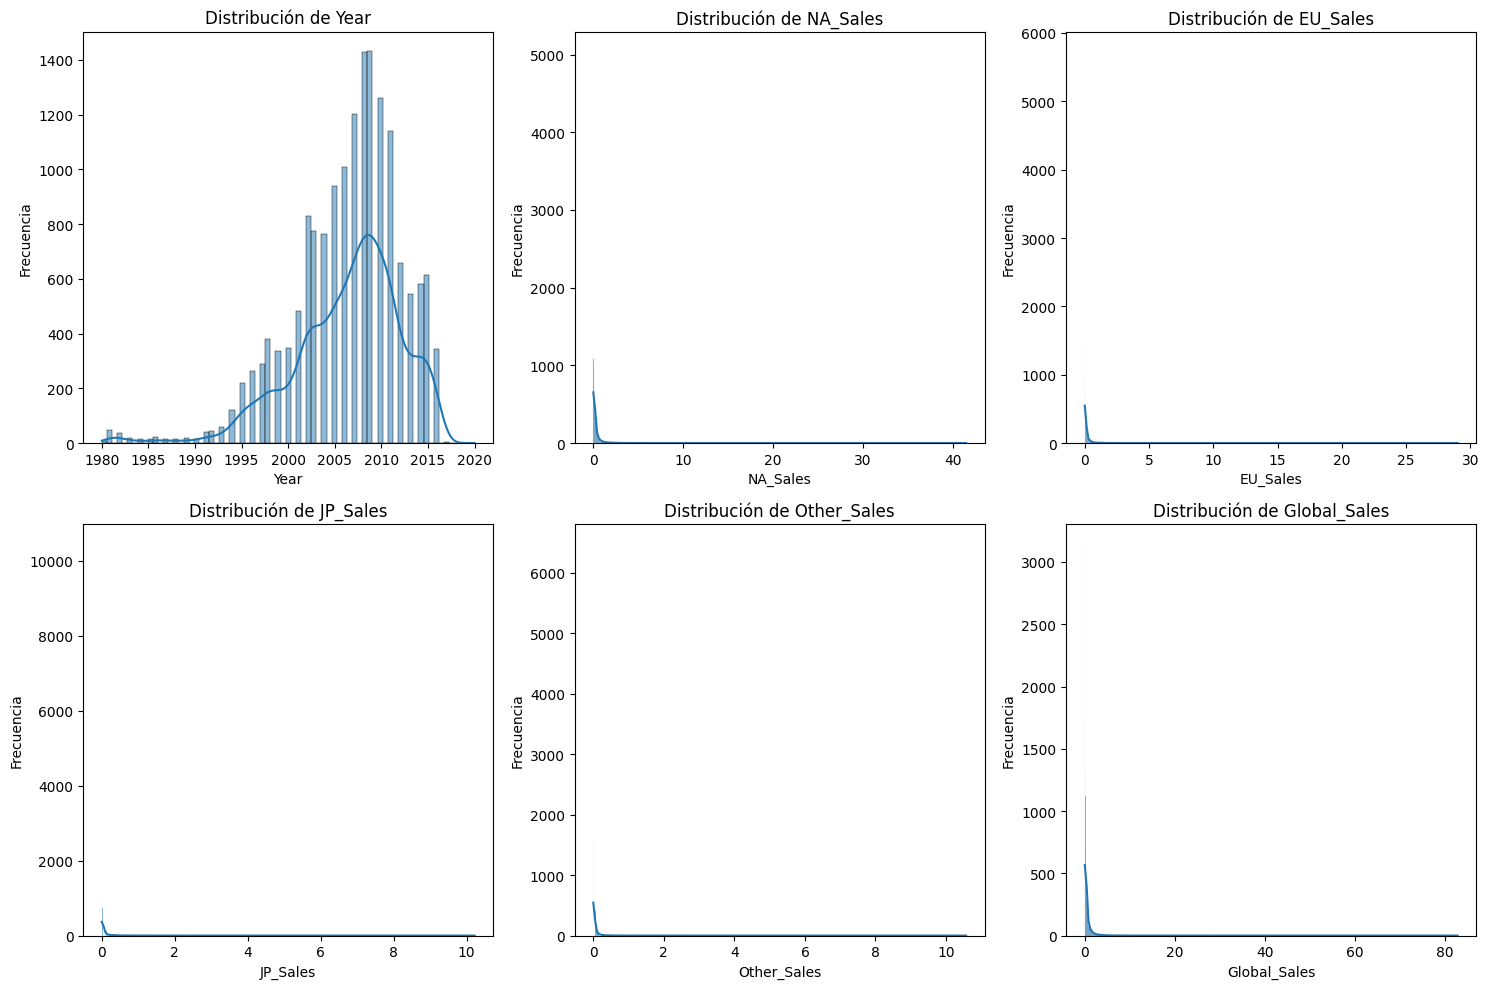

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de columnas num√©ricas para las que queremos ver la distribuci√≥n
numerical_cols = ['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

# Creamos una figura con subplots para cada columna
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)  # 2 filas, 3 columnas, posici√≥n i+1
    sns.histplot(df[col], kde=True)  # kde=True para mostrar una estimaci√≥n de densidad del kernel
    plt.title(f'Distribuci√≥n de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
plt.tight_layout()  # Ajusta los subplots para que no se superpongan
plt.show()

Conclusiones iniciales de las distribuciones:

Year: Muestra una tendencia creciente en el lanzamiento de videojuegos a lo largo del tiempo, con un pico alrededor de los a√±os 2000-2010, seguido de un descenso. Esto podr√≠a reflejar tendencias de la industria.


Ventas (NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales): Todas estas variables muestran una fuerte asimetr√≠a positiva (sesgo a la derecha). Esto es t√≠pico en datos de ventas donde pocos productos alcanzan un √©xito masivo. La mayor√≠a de los juegos tienen ventas modestas en comparaci√≥n con los "superventas".

## 1.2. Gr√°fico de barras

An√°lisis de las variables categoricas

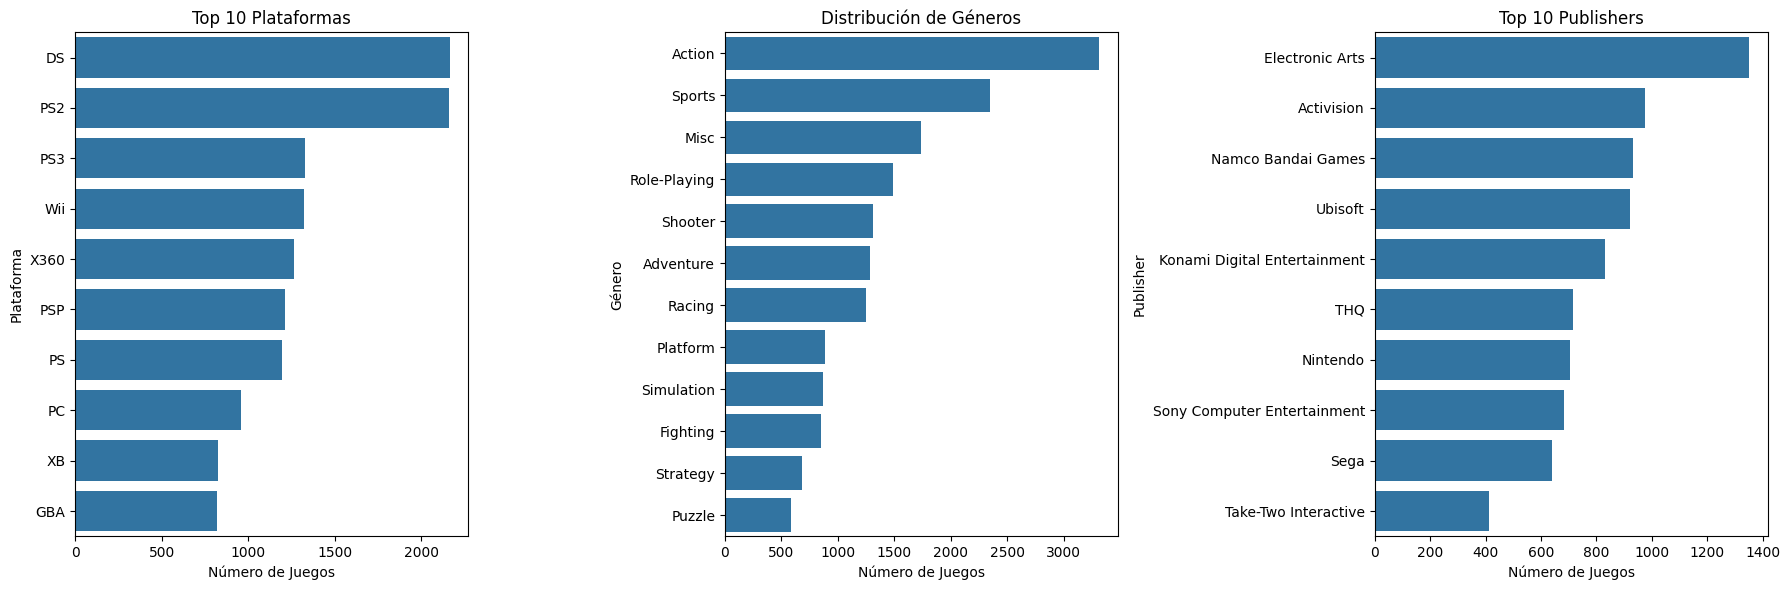

In [14]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.countplot(y='Platform', data=df, order=df['Platform'].value_counts().index[:10])
plt.title('Top 10 Plataformas')
plt.xlabel('N√∫mero de Juegos')
plt.ylabel('Plataforma')

plt.subplot(1, 3, 2)
sns.countplot(y='Genre', data=df, order=df['Genre'].value_counts().index)
plt.title('Distribuci√≥n de G√©neros')
plt.xlabel('N√∫mero de Juegos')
plt.ylabel('G√©nero')

plt.subplot(1, 3, 3)
# Para Publisher, vamos a mostrar solo los 10 m√°s frecuentes para evitar un gr√°fico ilegible
top_publishers = df['Publisher'].value_counts().index[:10]
sns.countplot(y='Publisher', data=df, order=top_publishers)
plt.title('Top 10 Publishers')
plt.xlabel('N√∫mero de Juegos')
plt.ylabel('Publisher')

plt.tight_layout()
plt.show()

Plataformas: La lista de las plataformas m√°s comunes refleja una √©poca pasada de la industria de los videojuegos. La ausencia de consolas m√°s recientes como PS4, PS5, Xbox One, Xbox Series X/S o Nintendo Switch sugiere que los datos se recopilaron principalmente hasta principios de la d√©cada de 2010. Esto es una informaci√≥n importante a tener en cuenta al interpretar los resultados y al pensar en la generalizaci√≥n del modelo a datos m√°s actuales.

G√©neros: La distribuci√≥n de g√©neros parece bastante equilibrada, con "Action" y "Sports" a la cabeza, seguidos de cerca por otros g√©neros populares. Esta diversidad de g√©neros podr√≠a ser √∫til para predecir las ventas, ya que es probable que diferentes g√©neros tengan diferentes patrones de ventas.

Publishers: La presencia de grandes publishers como Electronic Arts, Activision y Nintendo en el top 10 indica que estos actores importantes de la industria tienen una gran cantidad de t√≠tulos en el dataset. La influencia del publisher podr√≠a ser un factor a considerar en la predicci√≥n de ventas.

## 1.3. Boxplot para ventas globales

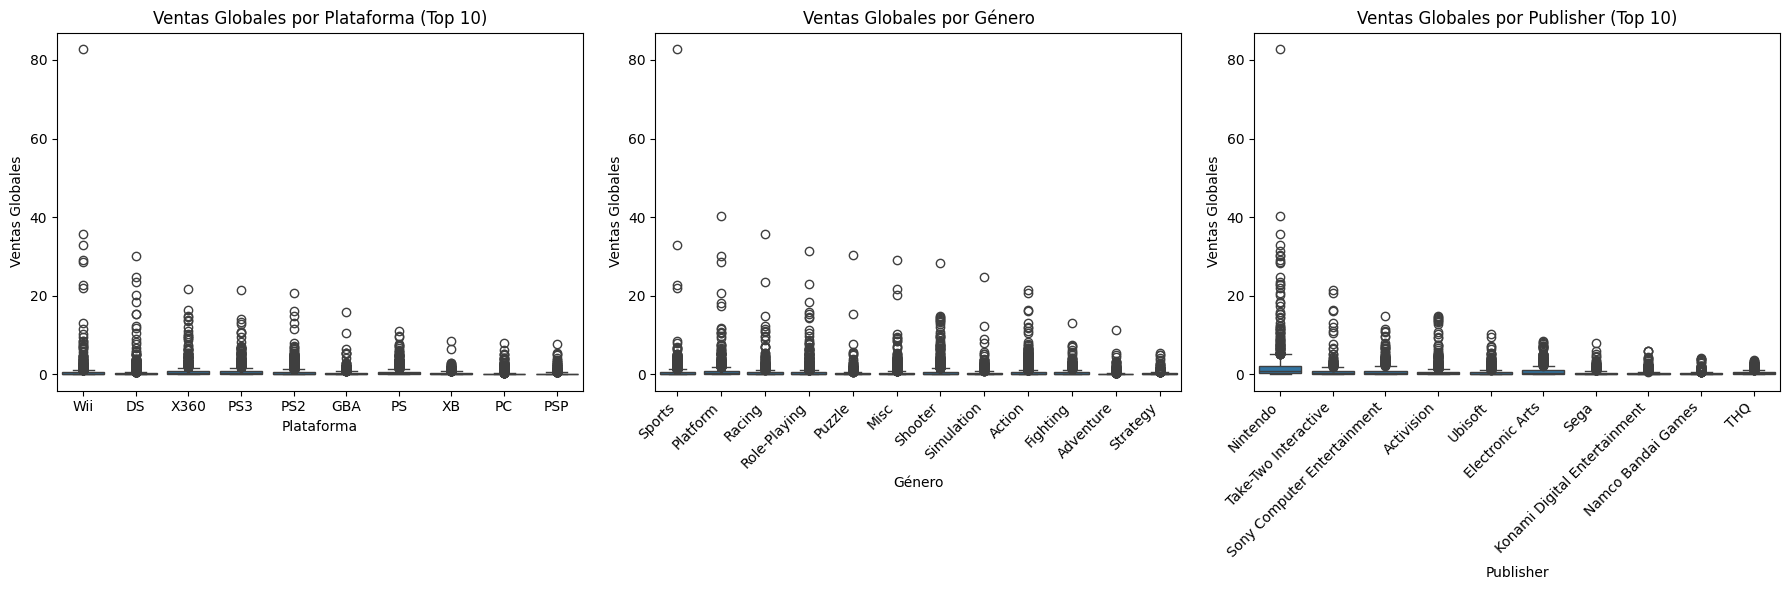

In [15]:
plt.figure(figsize=(18, 6))

# Diagrama de caja para Platform vs Global_Sales (top 10 plataformas)
top_platforms = df['Platform'].value_counts().index[:10]
plt.subplot(1, 3, 1)
sns.boxplot(x='Platform', y='Global_Sales', data=df[df['Platform'].isin(top_platforms)])
plt.title('Ventas Globales por Plataforma (Top 10)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales')

# Diagrama de caja para Genre vs Global_Sales
plt.subplot(1, 3, 2)
sns.boxplot(x='Genre', y='Global_Sales', data=df)
plt.title('Ventas Globales por G√©nero')
plt.xlabel('G√©nero')
plt.ylabel('Ventas Globales')
plt.xticks(rotation=45, ha='right') # Rotar las etiquetas para mejor legibilidad

# Diagrama de caja para Publisher vs Global_Sales (top 10 publishers)
top_publishers = df['Publisher'].value_counts().index[:10]
plt.subplot(1, 3, 3)
sns.boxplot(x='Publisher', y='Global_Sales', data=df[df['Publisher'].isin(top_publishers)])
plt.title('Ventas Globales por Publisher (Top 10)')
plt.xlabel('Publisher')
plt.ylabel('Ventas Globales')
plt.xticks(rotation=45, ha='right') # Rotar las etiquetas para mejor legibilidad

plt.tight_layout()
plt.show()

Sports: Muestra una mediana de ventas globales relativamente alta, aunque con una dispersi√≥n considerable y varios valores at√≠picos altos. Esto sugiere que, en promedio, los juegos de deportes tienden a vender bien, pero tambi√©n hay algunos √©xitos masivos y muchos con ventas m√°s modestas.


Platform: Tambi√©n presenta una mediana de ventas alta y valores at√≠picos significativos, como mencion√© antes.


Shooter y Role-Playing: Mantienen una mediana de ventas decente.


G√©neros como Action, Racing, Misc, Simulation, Fighting, Adventure, Strategy y Puzzle parecen tener medianas de ventas m√°s bajas en comparaci√≥n con "Sports" y "Platform".

## 2. Valores nulos

In [17]:
print(df.isnull().sum())

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


### 2.1. Manejo de Valores Nulos

En esta etapa del preprocesamiento, abordamos los valores faltantes identificados en nuestro dataset. Seg√∫n el an√°lisis inicial con df.info(), encontramos valores nulos en las columnas Year y Publisher.

Columna 'Year':

Se decidi√≥ imputar los valores nulos en la columna Year utilizando la mediana de los a√±os presentes en el dataset. La mediana es una medida de tendencia central robusta a los valores at√≠picos, lo que la convierte en una opci√≥n adecuada para evitar que valores extremos influyan demasiado en la imputaci√≥n. El objetivo de la imputaci√≥n es preservar la mayor cantidad de datos posible, ya que la eliminaci√≥n de filas con a√±os faltantes podr√≠a llevar a la p√©rdida de informaci√≥n valiosa para el modelo de regresi√≥n.
Columna 'Publisher':

Para la columna categ√≥rica Publisher, optamos por crear una nueva categor√≠a llamada "Unknown" para los valores faltantes. Esta estrategia tiene la ventaja de no introducir sesgos al reemplazar los valores nulos con la moda (el publisher m√°s frecuente). Adem√°s, la ausencia de informaci√≥n del publisher podr√≠a ser en s√≠ misma una caracter√≠stica relevante para el modelo. Al crear una categor√≠a expl√≠cita para los valores faltantes, permitimos que el modelo aprenda potencialmente de esta ausencia de informaci√≥n.
Tras aplicar estas t√©cnicas de manejo de valores nulos, verificamos que las columnas Year y Publisher ya no contengan valores faltantes, asegurando as√≠ un dataset m√°s completo para las etapas posteriores de preprocesamiento y modelado.

In [18]:
# Imputar los valores nulos en 'Year' con la mediana
median_year = df['Year'].median()
df['Year'].fillna(median_year, inplace=True)

# Imputar los valores nulos en 'Publisher' con la categor√≠a 'Unknown'
df['Publisher'].fillna('Unknown', inplace=True)

# Verificar que ya no hay valores nulos en estas columnas
print(df.isnull().sum())

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64


<ipython-input-18-fa5185497a97>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Year'].fillna(median_year, inplace=True)
<ipython-input-18-fa5185497a97>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

## 3. Codificaci√≥n de las variables categ√≥ricas (Platform, Genre, Publisher) utilizando one-hot encoding

Los modelos de regresi√≥n lineal requieren entradas num√©ricas, por lo que necesitamos convertir las variables categ√≥ricas ('Platform', 'Genre', 'Publisher') a un formato num√©rico. Utilizaremos la t√©cnica de **one-hot encoding** para crear variables binarias (dummy variables) para cada categor√≠a √∫nica en estas columnas. El argumento `drop_first=True` se utiliza para evitar la multicolinealidad.

In [19]:
# Aplicar one-hot encoding a las columnas 'Platform', 'Genre' y 'Publisher'
df = pd.get_dummies(df, columns=['Platform', 'Genre', 'Publisher'], drop_first=True)

# Mostrar las primeras filas del DataFrame con las columnas codificadas
print(df.head())

# Mostrar la informaci√≥n del DataFrame para ver los nuevos tipos de datos y la cantidad de columnas
df.info()

   Rank                      Name    Year  NA_Sales  EU_Sales  JP_Sales  \
0     1                Wii Sports  2006.0     41.49     29.02      3.77   
1     2         Super Mario Bros.  1985.0     29.08      3.58      6.81   
2     3            Mario Kart Wii  2008.0     15.85     12.88      3.79   
3     4         Wii Sports Resort  2009.0     15.75     11.01      3.28   
4     5  Pokemon Red/Pokemon Blue  1996.0     11.27      8.89     10.22   

   Other_Sales  Global_Sales  Platform_3DO  Platform_3DS  ...  \
0         8.46         82.74         False         False  ...   
1         0.77         40.24         False         False  ...   
2         3.31         35.82         False         False  ...   
3         2.96         33.00         False         False  ...   
4         1.00         31.37         False         False  ...   

   Publisher_Zushi Games  Publisher_bitComposer Games  \
0                  False                        False   
1                  False                    

## 4. A continuacion... se eliminara la columna "Name".

A primera vista, el nombre de un videojuego podr√≠a parecer una caracter√≠stica importante, ya que algunos nombres de franquicias o juegos individuales son muy populares y podr√≠an estar asociados con mayores ventas.

Sin embargo, para utilizar la columna Name directamente en un modelo de regresi√≥n lineal de la manera en que lo hemos planteado hasta ahora (con codificaci√≥n num√©rica), se requerir√≠a un procesamiento adicional significativo, como el an√°lisis de texto. Tendr√≠amos que extraer caracter√≠sticas relevantes de los nombres, como la presencia de ciertas palabras clave, la longitud del nombre, o incluso utilizar t√©cnicas m√°s avanzadas como TF-IDF o word embeddings.

In [20]:
df = df.drop('Name', axis=1)

print(df.head())

df.info()

   Rank    Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  \
0     1  2006.0     41.49     29.02      3.77         8.46         82.74   
1     2  1985.0     29.08      3.58      6.81         0.77         40.24   
2     3  2008.0     15.85     12.88      3.79         3.31         35.82   
3     4  2009.0     15.75     11.01      3.28         2.96         33.00   
4     5  1996.0     11.27      8.89     10.22         1.00         31.37   

   Platform_3DO  Platform_3DS  Platform_DC  ...  Publisher_Zushi Games  \
0         False         False        False  ...                  False   
1         False         False        False  ...                  False   
2         False         False        False  ...                  False   
3         False         False        False  ...                  False   
4         False         False        False  ...                  False   

   Publisher_bitComposer Games  Publisher_dramatic create  Publisher_fonfun  \
0                  

# 5. Modelo de regresi√≥n lineal m√∫ltiple

La Regresi√≥n Lineal M√∫ltiple es un modelo que asume una relaci√≥n lineal entre las variables independientes y la variable dependiente. Entrenaremos este modelo utilizando el conjunto de entrenamiento para aprender los coeficientes que mejor se ajustan a los datos.

In [21]:
from sklearn.model_selection import train_test_split

# Definir la variable objetivo (y) y las variables predictoras (X)
X = df.drop('Global_Sales', axis=1)
y = df['Global_Sales']

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar el tama√±o de los conjuntos de entrenamiento y prueba
print(f"Tama√±o del conjunto de entrenamiento (X): {X_train.shape}")
print(f"Tama√±o del conjunto de prueba (X): {X_test.shape}")
print(f"Tama√±o del conjunto de entrenamiento (y): {y_train.shape}")
print(f"Tama√±o del conjunto de prueba (y): {y_test.shape}")

Tama√±o del conjunto de entrenamiento (X): (13278, 624)
Tama√±o del conjunto de prueba (X): (3320, 624)
Tama√±o del conjunto de entrenamiento (y): (13278,)
Tama√±o del conjunto de prueba (y): (3320,)


## 5.1. Entrenamiento del modelo

In [22]:
from sklearn.linear_model import LinearRegression

# Inicializar el modelo de Regresi√≥n Lineal
linear_model = LinearRegression()

# Entrenar el modelo utilizando el conjunto de entrenamiento
linear_model.fit(X_train, y_train)

print("Modelo de Regresi√≥n Lineal entrenado.")

Modelo de Regresi√≥n Lineal entrenado.


## 5.2. Evaluaci√≥n del modelo

Utilizaremos varias m√©tricas comunes para evaluar modelos de regresi√≥n:

Error Cuadr√°tico Medio (Mean Squared Error - MSE): Mide el promedio de los cuadrados de los errores (la diferencia entre el valor predicho y el valor real). Un valor m√°s bajo indica un mejor ajuste.

Ra√≠z del Error Cuadr√°tico Medio (Root Mean Squared Error - RMSE): Es la ra√≠z cuadrada del MSE. Tiene las mismas unidades que la variable objetivo, lo que facilita la interpretaci√≥n.

Error Absoluto Medio (Mean Absolute Error - MAE): Mide el promedio de las magnitudes de los errores (la diferencia absoluta entre el valor predicho y el valor real). Tambi√©n es f√°cil de interpretar.

Coeficiente de Determinaci√≥n (R¬≤): Representa la proporci√≥n de la varianza en la variable dependiente que es predecible a partir de las variables independientes. Un valor 1  cercano a 1 indica un buen ajuste.


Los resultados de la evaluaci√≥n del modelo de Regresi√≥n Lineal son los siguientes:

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Hacer predicciones en el conjunto de prueba
y_pred = linear_model.predict(X_test)

# Calcular las m√©tricas de evaluaci√≥n
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir los resultados de la evaluaci√≥n
print("Resultados de la evaluaci√≥n del modelo de Regresi√≥n Lineal:")
print(f"Error Cuadr√°tico Medio (MSE): {mse:.2f}")
print(f"Ra√≠z del Error Cuadr√°tico Medio (RMSE): {rmse:.2f}")
print(f"Error Absoluto Medio (MAE): {mae:.2f}")
print(f"Coeficiente de Determinaci√≥n (R¬≤): {r2:.2f}")

Resultados de la evaluaci√≥n del modelo de Regresi√≥n Lineal:
Error Cuadr√°tico Medio (MSE): 0.00
Ra√≠z del Error Cuadr√°tico Medio (RMSE): 0.01
Error Absoluto Medio (MAE): 0.00
Coeficiente de Determinaci√≥n (R¬≤): 1.00


### 5.3. Gr√°fico de Dispersi√≥n: Comparaci√≥n entre Ventas Globales Reales y Predichas

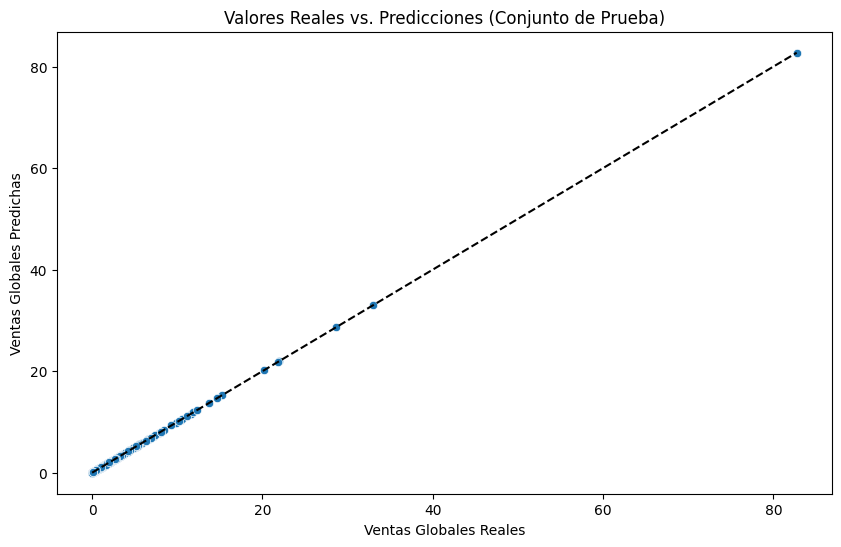

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--') # L√≠nea diagonal para referencia
plt.xlabel('Ventas Globales Reales')
plt.ylabel('Ventas Globales Predichas')
plt.title('Valores Reales vs. Predicciones (Conjunto de Prueba)')
plt.show()

In [25]:
# Mostrar las primeras filas de X
print("Primeras filas de X:")
print(X.head())

# Mostrar las columnas de X
print("\nColumnas de X:")
print(X.columns.tolist())

Primeras filas de X:
   Rank    Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Platform_3DO  \
0     1  2006.0     41.49     29.02      3.77         8.46         False   
1     2  1985.0     29.08      3.58      6.81         0.77         False   
2     3  2008.0     15.85     12.88      3.79         3.31         False   
3     4  2009.0     15.75     11.01      3.28         2.96         False   
4     5  1996.0     11.27      8.89     10.22         1.00         False   

   Platform_3DS  Platform_DC  Platform_DS  ...  Publisher_Zushi Games  \
0         False        False        False  ...                  False   
1         False        False        False  ...                  False   
2         False        False        False  ...                  False   
3         False        False        False  ...                  False   
4         False        False        False  ...                  False   

   Publisher_bitComposer Games  Publisher_dramatic create  Publisher_fonfun  \
0   

## 5.4. Predicci√≥n de Registros Aleatorios

Para tener una idea m√°s concreta del rendimiento del modelo a nivel individual, seleccionaremos un registro aleatorio del conjunto de prueba y veremos cu√°l es la predicci√≥n de nuestro modelo para ese registro, compar√°ndola con el valor real.

Seleccionamos un registro aleatorio del conjunto de prueba, obtenemos sus caracter√≠sticas y realizamos una predicci√≥n con el modelo entrenado. Tambi√©n recuperamos el valor real de las ventas globales para este registro.


In [26]:
import random

# Seleccionar un √≠ndice aleatorio del conjunto de prueba
random_index = random.choice(X_test.index)

# Obtener las caracter√≠sticas del registro aleatorio
random_record = X_test.loc[[random_index]]

# Hacer la predicci√≥n para este registro
predicted_sales = linear_model.predict(random_record)[0]

# Obtener el valor real de las ventas globales para este registro
actual_sales = y_test.loc[random_index]

# Imprimir la informaci√≥n
print("Predicci√≥n de un registro aleatorio del conjunto de prueba:")
print("\nCaracter√≠sticas del registro:")
print(random_record)
print(f"\nVentas Globales Predichas: {predicted_sales:.2f}")
print(f"Ventas Globales Reales: {actual_sales:.2f}")

Predicci√≥n de un registro aleatorio del conjunto de prueba:

Caracter√≠sticas del registro:
      Rank    Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Platform_3DO  \
8126  8128  1999.0       0.1      0.07       0.0         0.01         False   

      Platform_3DS  Platform_DC  Platform_DS  ...  Publisher_Zushi Games  \
8126         False        False        False  ...                  False   

      Publisher_bitComposer Games  Publisher_dramatic create  \
8126                        False                      False   

      Publisher_fonfun  Publisher_iWin  Publisher_id Software  \
8126             False           False                  False   

      Publisher_imageepoch Inc.  Publisher_inXile Entertainment  \
8126                      False                           False   

      Publisher_mixi, Inc  Publisher_responDESIGN  
8126                False                   False  

[1 rows x 624 columns]

Ventas Globales Predichas: 0.18
Ventas Globales Reales: 0.18


## üìå Mas predicciones

In [33]:
import random
import pandas as pd

# N√∫mero de predicciones a realizar
num_predictions = 5

print(f"Realizando {num_predictions} predicciones aleatorias del conjunto de prueba:\n")

for _ in range(num_predictions):
    # Seleccionar un √≠ndice aleatorio del conjunto de prueba
    random_index = random.choice(X_test.index)

    # Obtener las caracter√≠sticas del registro aleatorio
    random_record = X_test.loc[[random_index]]

    # Hacer la predicci√≥n para este registro
    predicted_sales = linear_model.predict(random_record)[0]

    # Obtener el valor real de las ventas globales para este registro
    actual_sales = y_test.loc[random_index]

    # Imprimir la informaci√≥n
    print(f"√çndice del registro: {random_index}")
    print(f"  Ventas Globales Predichas: {predicted_sales:.2f}")
    print(f"  Ventas Globales Reales: {actual_sales:.2f}\n")

Realizando 5 predicciones aleatorias del conjunto de prueba:

√çndice del registro: 4826
  Ventas Globales Predichas: 0.39
  Ventas Globales Reales: 0.40

√çndice del registro: 12877
  Ventas Globales Predichas: 0.05
  Ventas Globales Reales: 0.05

√çndice del registro: 15762
  Ventas Globales Predichas: 0.02
  Ventas Globales Reales: 0.02

√çndice del registro: 15593
  Ventas Globales Predichas: 0.02
  Ventas Globales Reales: 0.02

√çndice del registro: 8807
  Ventas Globales Predichas: 0.15
  Ventas Globales Reales: 0.15



## 6. Conclusiones y An√°lisis Final

En este proyecto, hemos desarrollado un modelo de regresi√≥n lineal para predecir las ventas globales de videojuegos. Tras realizar la carga, exploraci√≥n y preprocesamiento de los datos, el modelo fue entrenado y evaluado en un conjunto de prueba.

Los resultados de la evaluaci√≥n mostraron un rendimiento sorprendentemente alto, con un Coeficiente de Determinaci√≥n (R¬≤) cercano a 1 y valores muy bajos para el Error Cuadr√°tico Medio (MSE), la Ra√≠z del Error Cuadr√°tico Medio (RMSE) y el Error Absoluto Medio (MAE). La gr√°fica de dispersi√≥n de los valores reales contra los predichos tambi√©n sugiere una fuerte correlaci√≥n y una alta precisi√≥n en las predicciones para el conjunto de prueba.

Si bien estos resultados indican un muy buen ajuste del modelo a los datos de prueba, es importante ser cauteloso y considerar posibles explicaciones para un rendimiento tan perfecto. Podr√≠a ser que las relaciones entre las variables predictoras y la variable objetivo en este dataset, despu√©s del preprocesamiento, sean excepcionalmente lineales.

Es importante recordar que este dataset parece ser relativamente antiguo, lo que podr√≠a limitar la generalizaci√≥n del modelo a videojuegos m√°s recientes. Adem√°s, aunque exploramos la columna 'Name', decidimos no incluirla directamente en el modelo debido a su alta cardinalidad y la necesidad de t√©cnicas m√°s avanzadas para su procesamiento.

Como posibles pasos futuros, se podr√≠a explorar el rendimiento de otros modelos de regresi√≥n m√°s complejos (como Random Forest o Gradient Boosting), realizar una ingenier√≠a de caracter√≠sticas m√°s exhaustiva (incluyendo un posible an√°lisis de la columna 'Name'), y considerar la obtenci√≥n de datos m√°s recientes para evaluar la capacidad de generalizaci√≥n del modelo en el tiempo.

# ¬øSirve este modelo para que otras personas puedan hacer predicciones?

Directamente, tal como est√° ahora, este modelo tiene limitaciones para que otras personas hagan predicciones precisas de sus propios videojuegos.

Limitaciones del Modelo Actual para Predicciones Externas:

Entrenamiento con Datos Espec√≠ficos: Este modelo se entren√≥ con un dataset particular de ventas de videojuegos que abarca principalmente juegos hasta principios de la d√©cada de 2010. Las tendencias del mercado de videojuegos, las plataformas populares y los g√©neros con mayor √©xito han evolucionado significativamente desde entonces. Un juego lanzado en 2025 podr√≠a tener din√°micas de ventas muy diferentes a las de un juego de 2006, por ejemplo.


Dependencia de las Caracter√≠sticas del Dataset: El modelo aprendi√≥ las relaciones entre las ventas globales y las caracter√≠sticas presentes en el dataset: Platform, Year, Genre, y Publisher. Para que alguien m√°s pudiera usar este modelo, necesitar√≠an tener datos de sus propios videojuegos exactamente en el mismo formato y con las mismas columnas (despu√©s del preprocesamiento, esto incluye las variables codificadas con one-hot encoding y las variables num√©ricas escaladas).


Falta de Generalizaci√≥n a Nuevas Plataformas, G√©neros o Publishers: Si un videojuego nuevo se lanza en una plataforma que no estaba presente en el dataset de entrenamiento (por ejemplo, PlayStation 5 o Nintendo Switch), o pertenece a un subg√©nero muy nuevo, el modelo no tendr√≠a informaci√≥n previa para hacer una predicci√≥n confiable. Lo mismo ocurre con publishers que no estaban en nuestro conjunto de datos.


No Considera Factores Externos Clave: Este modelo actual no tiene en cuenta muchos factores cruciales que influyen en el √©xito de un videojuego, como:

- Calidad del juego y rese√±as: La recepci√≥n cr√≠tica y del p√∫blico son predictores importantes de ventas.


- Marketing y publicidad: Una campa√±a de marketing exitosa puede impulsar significativamente las ventas.


- Precio: El precio de venta afecta directamente la cantidad de unidades vendidas y los ingresos.


- Competencia: El lanzamiento de juegos similares al mismo tiempo puede afectar las ventas.


- Tendencias del mercado y modas: Ciertos tipos de juegos o mec√°nicas pueden ser m√°s populares en diferentes momentos.


- Influencia de streamers y creadores de contenido.


Naturaleza Est√°tica del Modelo: El modelo que se entren√≥ es est√°tico. No se actualiza con nueva informaci√≥n del mercado.



Para que un modelo sea √∫til para predicciones externas de nuevos videojuegos, se necesitar√≠a:

Un dataset de entrenamiento mucho m√°s amplio y actualizado: Que incluya datos de juegos m√°s recientes y las plataformas y g√©neros actuales.

Ingenier√≠a de caracter√≠sticas m√°s sofisticada: Incorporar variables que capturen la calidad del juego (quiz√°s a trav√©s de an√°lisis de texto de rese√±as), la inversi√≥n en marketing (si se dispusiera de esos datos), el precio, etc.

Un modelo m√°s complejo: Quiz√°s un modelo de aprendizaje autom√°tico m√°s avanzado que pueda capturar mejor las relaciones no lineales y las interacciones complejas entre las variables.

Posibilidad de ingresar nuevas categor√≠as: El modelo deber√≠a poder manejar plataformas, g√©neros o publishers que no vio durante el entrenamiento (aunque esto es un desaf√≠o).

Reentrenamiento peri√≥dico: El modelo deber√≠a ser reentrenado con datos nuevos para mantenerse al d√≠a con las tendencias del mercado.